# 6.6 Sourcing & Analyzing Time Series Data

## GDELT Conflict Dataset 1.0 (2021)

#### -Errol Hinkamp

##### Table of Contents

1. Import libraries
2. Import data
3. Wrangle data
4. Plot data
5. Check for stationarity
6. Stationarize data
7. Bonus Task
- 7.1 Prepare initial ARIMA parameters
- 7.2 Split data
- 7.3 Run ARIMA model
- 7.4 Re-run differencing
- 7.5 Re-run ARIMA model
- 7.6 Re-run differencing
- 7.7 Re-run ARIMA model

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
from datetime import datetime
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ARIMA

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# 2. Import data

In [3]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 6'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gdelt_trimmed.csv'))
df

,Unnamed: 0,Year,CountryName,SumEvents,EventRootDescr,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone,Destabilization category
0,0,1979,China,350,FIGHT,Fight with small arms and light weapons,-10.0,3.988571,1396,1.906000,Extremely destabilizing
1,1,1979,Croatia,14,FIGHT,"Use conventional military force, not specified...",-10.0,2.642857,37,4.335594,Extremely destabilizing
2,2,1979,Sudan,16,COERCE,"Arrest, detain, or charge with legal action",-5.0,6.000000,96,3.358047,Moderately destabilizing
3,3,1979,Syria,71,FIGHT,Fight with small arms and light weapons,-10.0,3.647887,259,3.557653,Extremely destabilizing
4,4,1979,Germany,33,COERCE,"Impose administrative sanctions, not specified...",-5.0,4.484848,148,4.841399,Moderately destabilizing
...,...,...,...,...,...,...,...,...,...,...,...
171789,171789,2020,Paraguay,1,USE UNCONVENTIONAL MASS VIOLENCE,Engage in ethnic cleansing,-10.0,2.000000,2,-0.833333,Extremely destabilizing
171790,171790,2020,Andorra,1,ASSAULT,Assassinate,-10.0,8.000000,8,-2.494443,Extremely destabilizing
171791,171791,2020,Gibraltar,4,FIGHT,Employ aerial weapons,-10.0,3.750000,15,-1.181874,Extremely destabilizing
171792,171792,2020,Gaza Strip,2,ASSAULT,Kill by physical assault,-10.0,5.000000,10,-7.157464,Extremely destabilizing


In [4]:
# Drop first column
df=df.drop(df.columns[0], axis=1)
df

,Year,CountryName,SumEvents,EventRootDescr,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone,Destabilization category
0,1979,China,350,FIGHT,Fight with small arms and light weapons,-10.0,3.988571,1396,1.906000,Extremely destabilizing
1,1979,Croatia,14,FIGHT,"Use conventional military force, not specified...",-10.0,2.642857,37,4.335594,Extremely destabilizing
2,1979,Sudan,16,COERCE,"Arrest, detain, or charge with legal action",-5.0,6.000000,96,3.358047,Moderately destabilizing
3,1979,Syria,71,FIGHT,Fight with small arms and light weapons,-10.0,3.647887,259,3.557653,Extremely destabilizing
4,1979,Germany,33,COERCE,"Impose administrative sanctions, not specified...",-5.0,4.484848,148,4.841399,Moderately destabilizing
...,...,...,...,...,...,...,...,...,...,...
171789,2020,Paraguay,1,USE UNCONVENTIONAL MASS VIOLENCE,Engage in ethnic cleansing,-10.0,2.000000,2,-0.833333,Extremely destabilizing
171790,2020,Andorra,1,ASSAULT,Assassinate,-10.0,8.000000,8,-2.494443,Extremely destabilizing
171791,2020,Gibraltar,4,FIGHT,Employ aerial weapons,-10.0,3.750000,15,-1.181874,Extremely destabilizing
171792,2020,Gaza Strip,2,ASSAULT,Kill by physical assault,-10.0,5.000000,10,-7.157464,Extremely destabilizing


##### Data was already cleaned in a previous exercise, so I will forgo doing so again

# 3. Wrangle data

In [6]:
# Calculate events per year
timeline=df.groupby('Year')['SumEvents'].sum()
timeline=pd.DataFrame(timeline)
timeline

,SumEvents
Year,
1979,41454
1980,64878
1981,85421
1982,101142
1983,113774
1984,119871
1985,136185
1986,139007
1987,135084


In [7]:
# Reset index
timeline=timeline.reset_index()
# Make new datetime column and set it as index
timeline['datetime']=timeline['Year']*10000+1231
timeline['datetime']=pd.to_datetime(timeline['datetime'].astype('int64').astype('str'), yearfirst=True)
timeline=timeline.set_index('datetime')
# Drop year column
timeline.drop(['Year'], axis=1, inplace=True)
timeline

,SumEvents
datetime,
1979-12-31,41454
1980-12-31,64878
1981-12-31,85421
1982-12-31,101142
1983-12-31,113774
1984-12-31,119871
1985-12-31,136185
1986-12-31,139007
1987-12-31,135084


# 4. Plot data

In [8]:
# Define fixed size for all special charts
rcParams['figure.figsize'] = 18, 7

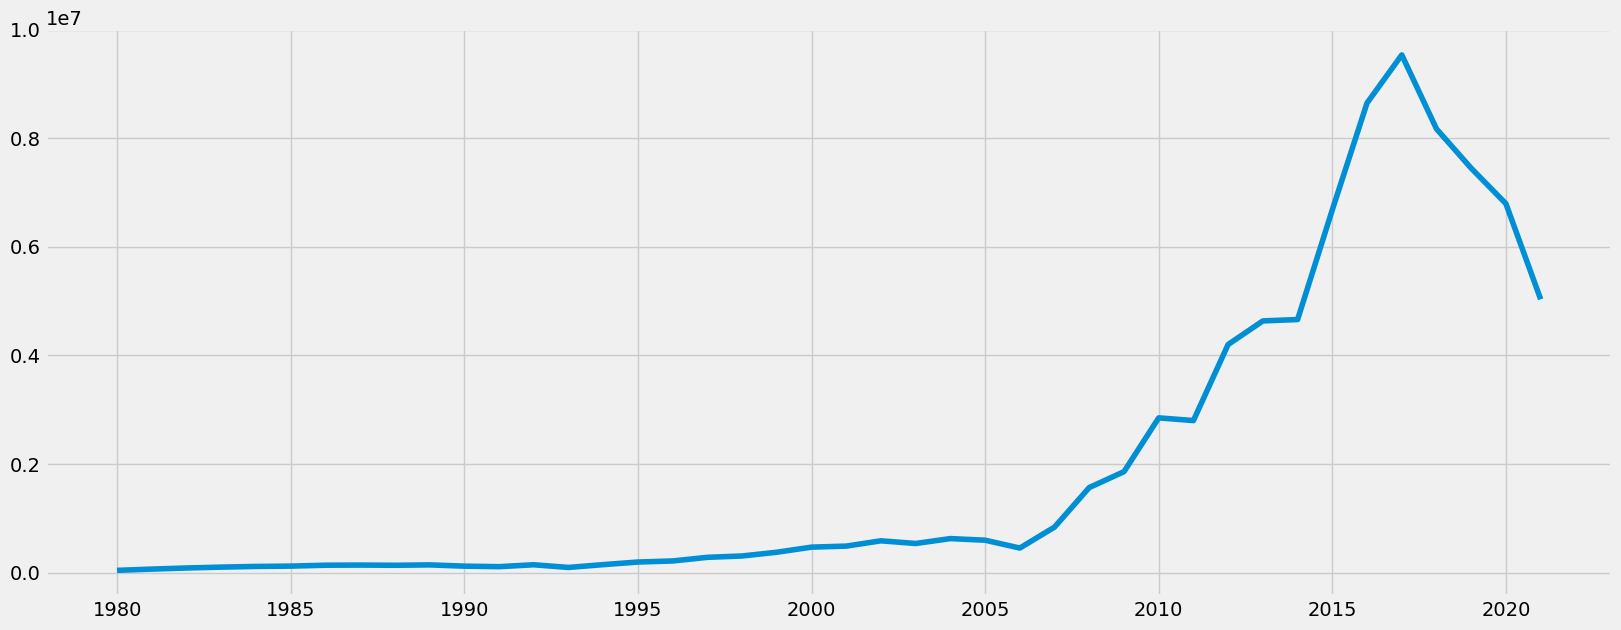

In [9]:
# Plot data
plt.figure(dpi=100)
plt.plot(timeline)

In [10]:
# Decompose data using additive model
decomposition = sm.tsa.seasonal_decompose(timeline, model='additive')

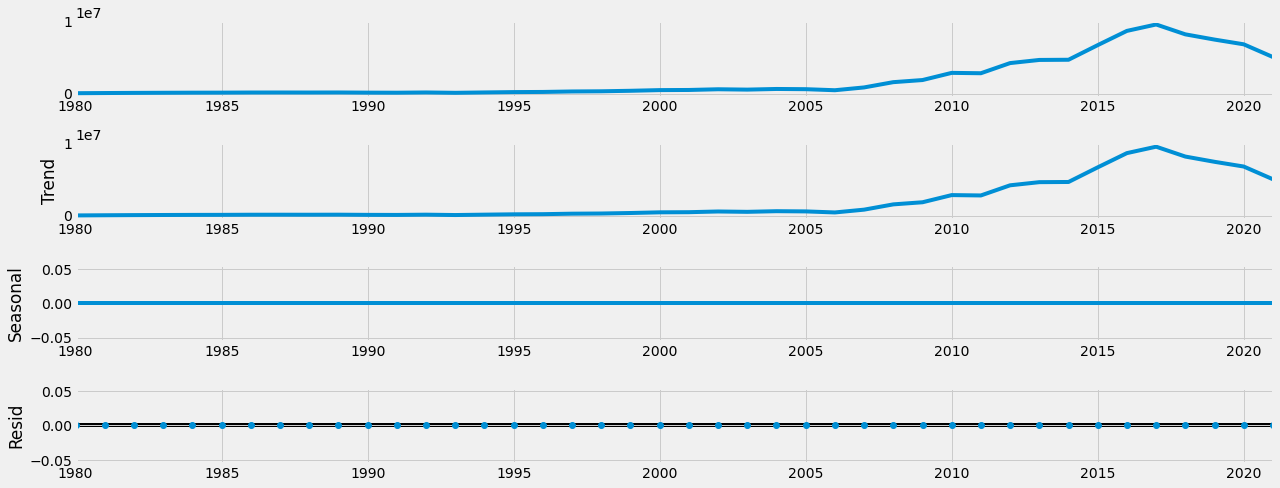

In [11]:
# Plot separate components
decomposition.plot()
plt.show()

##### These results show a lack of seasonality and noise in the data. This is unsurprising, as the dataset only records the year of an event's occurance. If the data was more precise and presented a complete date for events, perhaps some seasonality would present itself.

# 5. Check for stationarity

##### My null-hypothesis is that there is a unit-root, making the data non-stationary. If this can be rejected, then the data is stationary and analysis can continue.

In [12]:
# Run Dickey-Fuller test
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(timeline['SumEvents'])

Dickey-Fuller Stationarity test:
Test Statistic                  1.389617
p-value                         0.997066
Number of Lags Used            10.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


##### Cannot reject null-hypothesis, as the test statistic is larger than all three critical values and the p-value is far too large. Also, a simple glance at the graph should make it pretty obvious that the data is non-stationary.

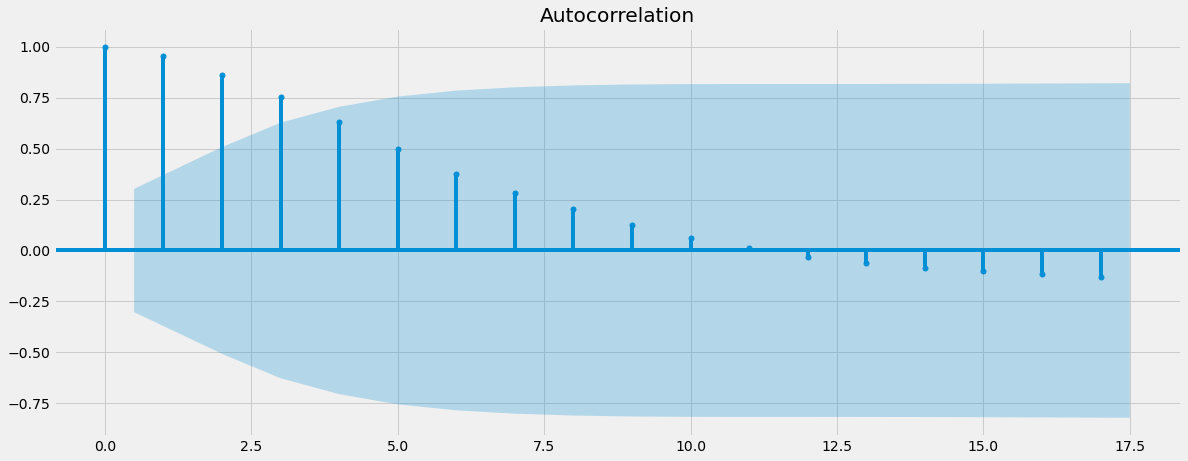

In [13]:
# Test for autocorrelation
plot_acf(timeline)
plt.show()

##### Most vertical lines remain within the confidence interval, so autocorrelation is not a concern. Unsurprising, given the imprecision of the dates in the dataset.

# 6. Stationarize data

In [14]:
# Apply differencing to data
timeline_t1=timeline-timeline.shift(1)
# Remove missing values
timeline_t1.dropna(inplace = True)

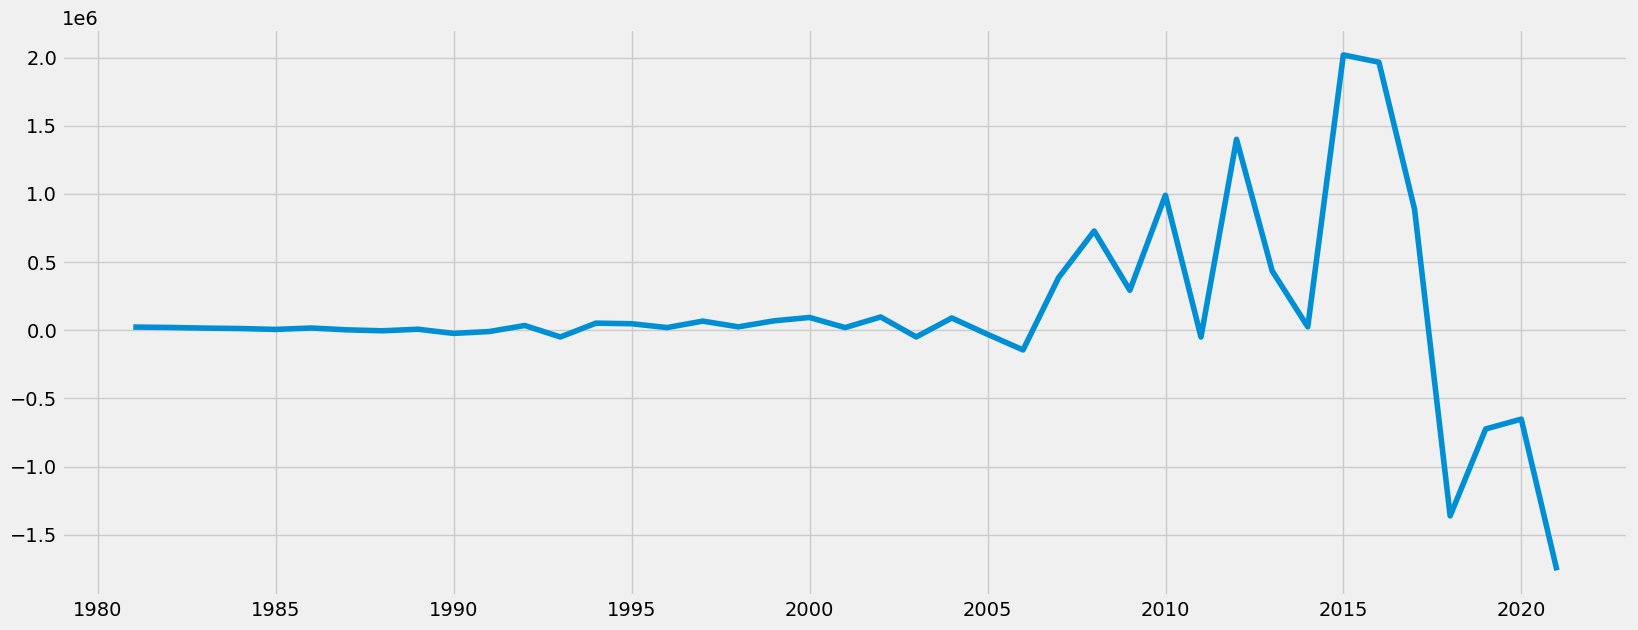

In [15]:
# Plot new data
plt.figure(dpi=100)
plt.plot(timeline_t1)

In [16]:
# Re-run Dickey-Fuller test
dickey_fuller(timeline_t1)

Dickey-Fuller Stationarity test:
Test Statistic                -8.262978e+00
p-value                        5.025045e-13
Number of Lags Used            9.000000e+00
Number of Observations Used    3.100000e+01
Critical Value (1%)           -3.661429e+00
Critical Value (5%)           -2.960525e+00
Critical Value (10%)          -2.619319e+00
dtype: float64


##### Test statistic is now smaller than all three critical values and p-value is < 0.05. Null-hypothesis can be rejected and data can be considered stationary!

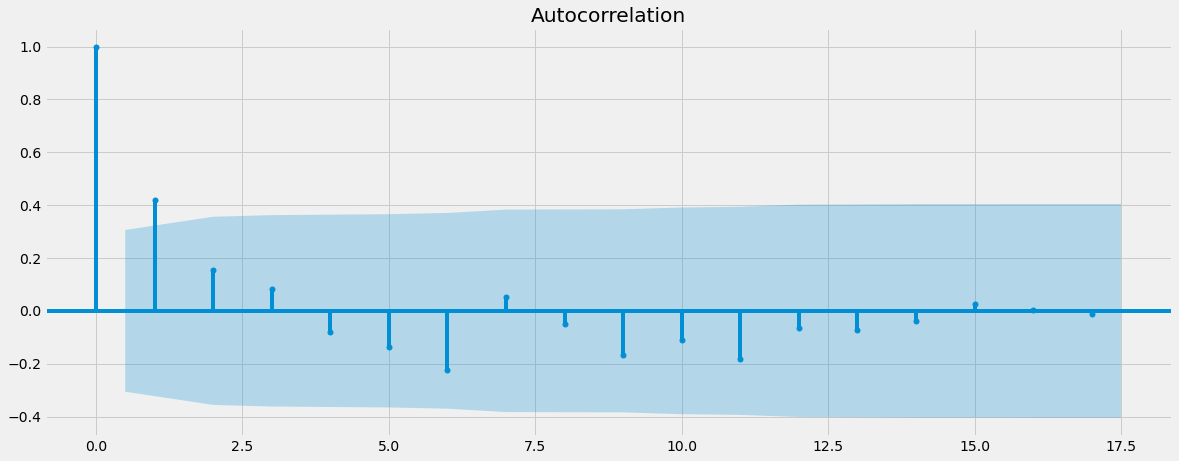

In [17]:
# Test for autocorrelation
plot_acf(timeline_t1)
plt.show()

##### Still no autocorrelation to worry about

# 7. Bonus Task

### 7.1 Prepare initial ARIMA parameters

##### As the dataset was differenced only a single time, I will use d=1

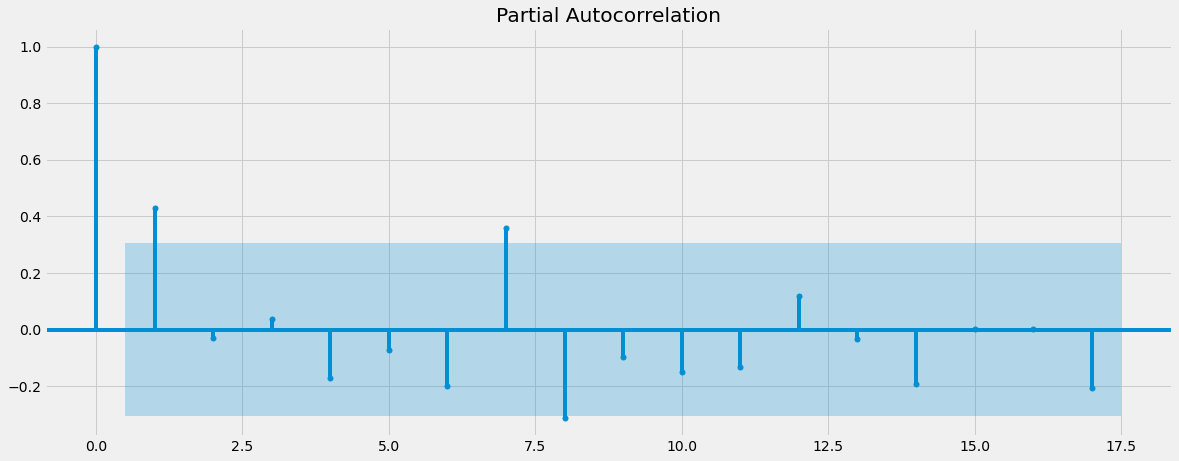

<Figure size 1800x700 with 0 Axes>

In [18]:
# Plot partial autocorrelations to find "p"
plot_pacf(timeline_t1)
plt.figure(dpi=100)
plt.show()

##### Looks very similar to the autocorrelation chart. For some reason this plot has a confidence interval, which none of the examples had. The highest positive bar is 1, so I will use p=1

##### The autocorrelation chart above has three vertical bars above the confidence interval, so I will use q=3

### 7.2 Split data

In [19]:
# Split data 70/30
train=timeline_t1[:int(timeline_t1.shape[0]*0.7)]
test=timeline_t1[int(timeline_t1.shape[0]*0.7):]

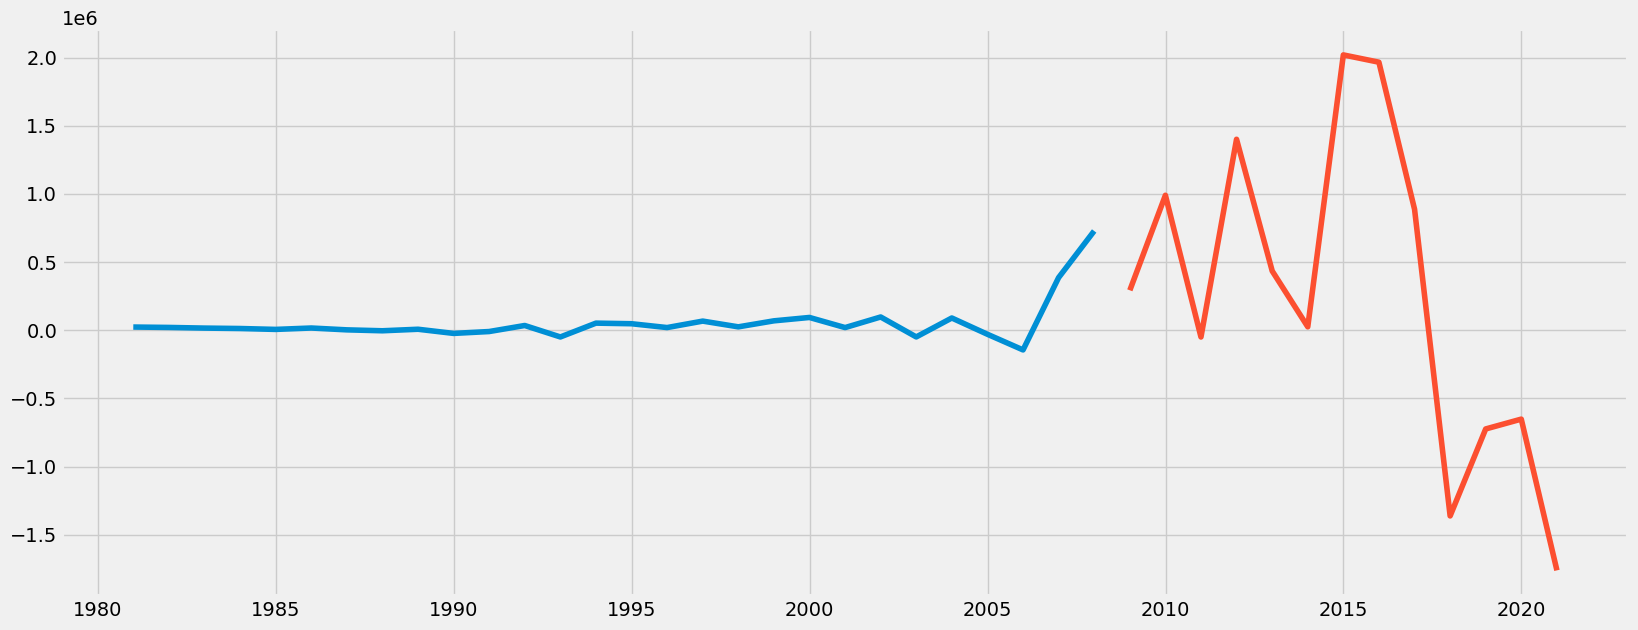

In [20]:
# Plot both sets to see the split
plt.figure(dpi=100)
plt.plot(train)
plt.plot(test)

In [20]:
# Get shape of test set for confidence interval later
test.shape

(13, 1)

### 7.3 Run ARIMA model

                             ARIMA Model Results                              
Dep. Variable:            D.SumEvents   No. Observations:                   27
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -360.008
Method:                       css-mle   S.D. of innovations         140381.665
Date:                Fri, 28 Jan 2022   AIC                            732.017
Time:                        21:11:10   BIC                            739.792
Sample:                    12-31-1981   HQIC                           734.329
                         - 12-31-2007                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               2.61e+04   9844.505      2.651      0.008    6807.155    4.54e+04
ar.L1.D.SumEvents     0.9989      0.038     26.038      0.000       0.924       1.074
ma.L1.D.SumEvents    -1.

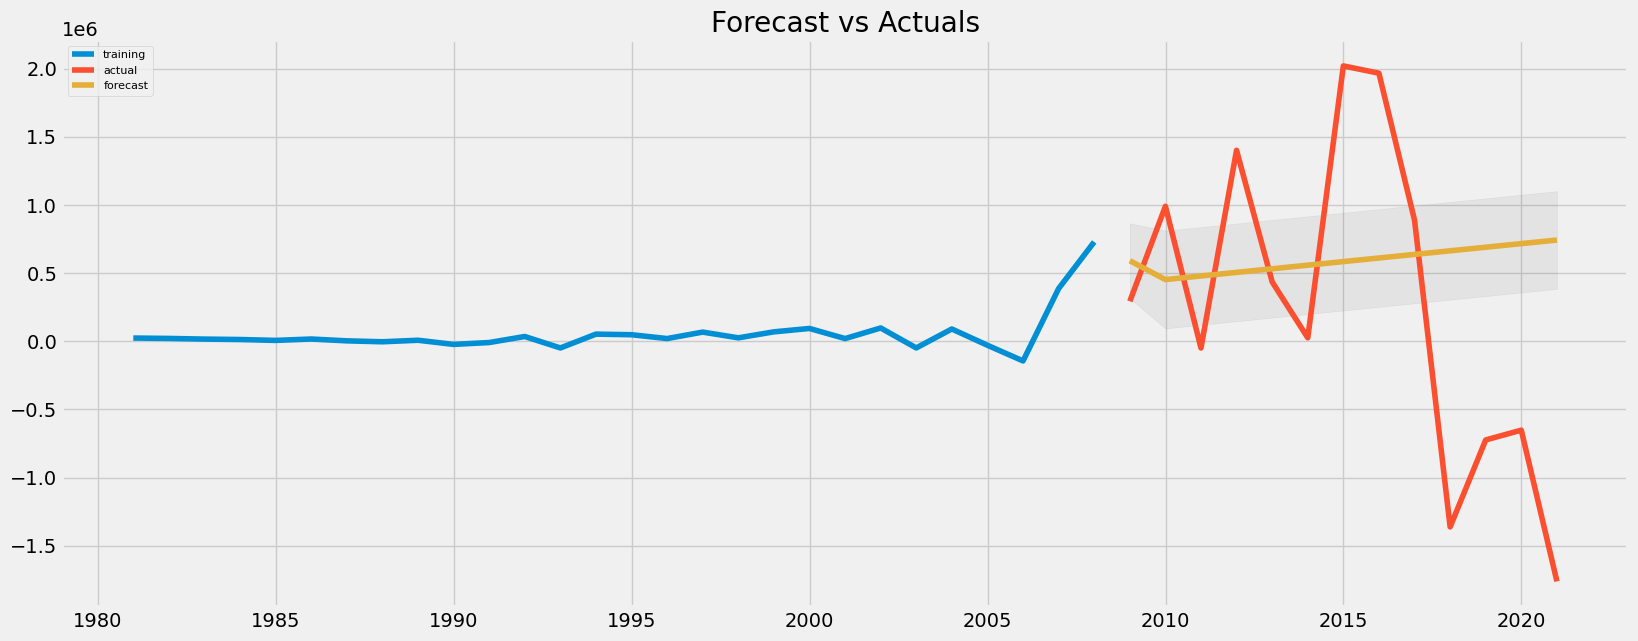

In [21]:
model = ARIMA(train, order=(1, 1, 3))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

##### Plot doesn't fall within confidence interval but the AR function is < 0.05. Will trying decreasing value of "q."

In [33]:
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

LinAlgError: SVD did not converge

##### Nope. Try some more.

                             ARIMA Model Results                              
Dep. Variable:            D.SumEvents   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -355.796
Method:                       css-mle   S.D. of innovations         127144.601
Date:                Fri, 28 Jan 2022   AIC                            719.592
Time:                        21:20:17   BIC                            724.775
Sample:                    12-31-1981   HQIC                           721.133
                         - 12-31-2007                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               2.61e+04   2.86e+04      0.912      0.362      -3e+04    8.22e+04
ar.L1.D.SumEvents    -0.5650      0.252     -2.242      0.025      -1.059      -0.071
ma.L1.D.SumEvents     0.

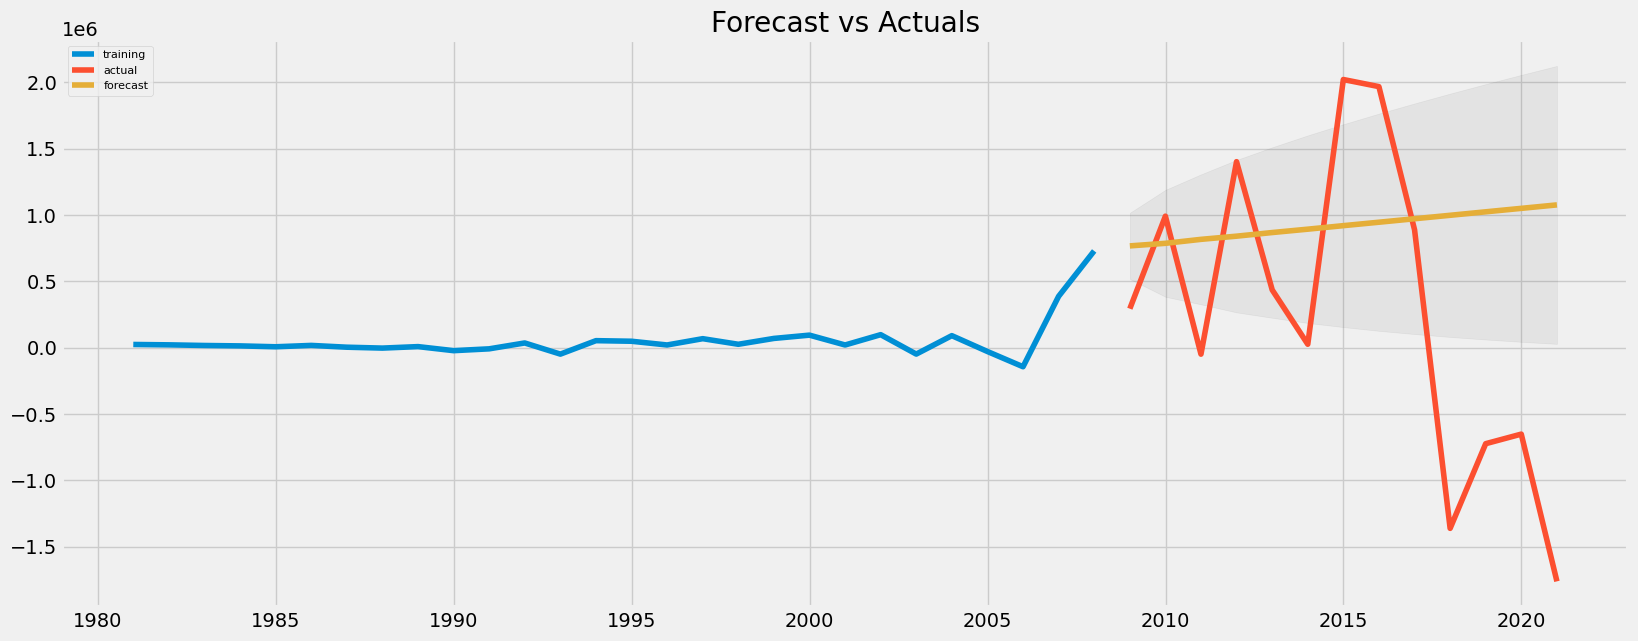

In [34]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

##### Summary statistics look okay but the graph is still bad. Now I'm going to just throw numbers around until I find something that works.

                             ARIMA Model Results                              
Dep. Variable:            D.SumEvents   No. Observations:                   27
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -355.451
Method:                       css-mle   S.D. of innovations         125251.485
Date:                Fri, 28 Jan 2022   AIC                            720.901
Time:                        21:21:55   BIC                            727.381
Sample:                    12-31-1981   HQIC                           722.828
                         - 12-31-2007                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               2.61e+04   2.39e+04      1.090      0.276   -2.08e+04     7.3e+04
ar.L1.D.SumEvents    -0.5543      0.256     -2.168      0.030      -1.055      -0.053
ar.L2.D.SumEvents    -0.

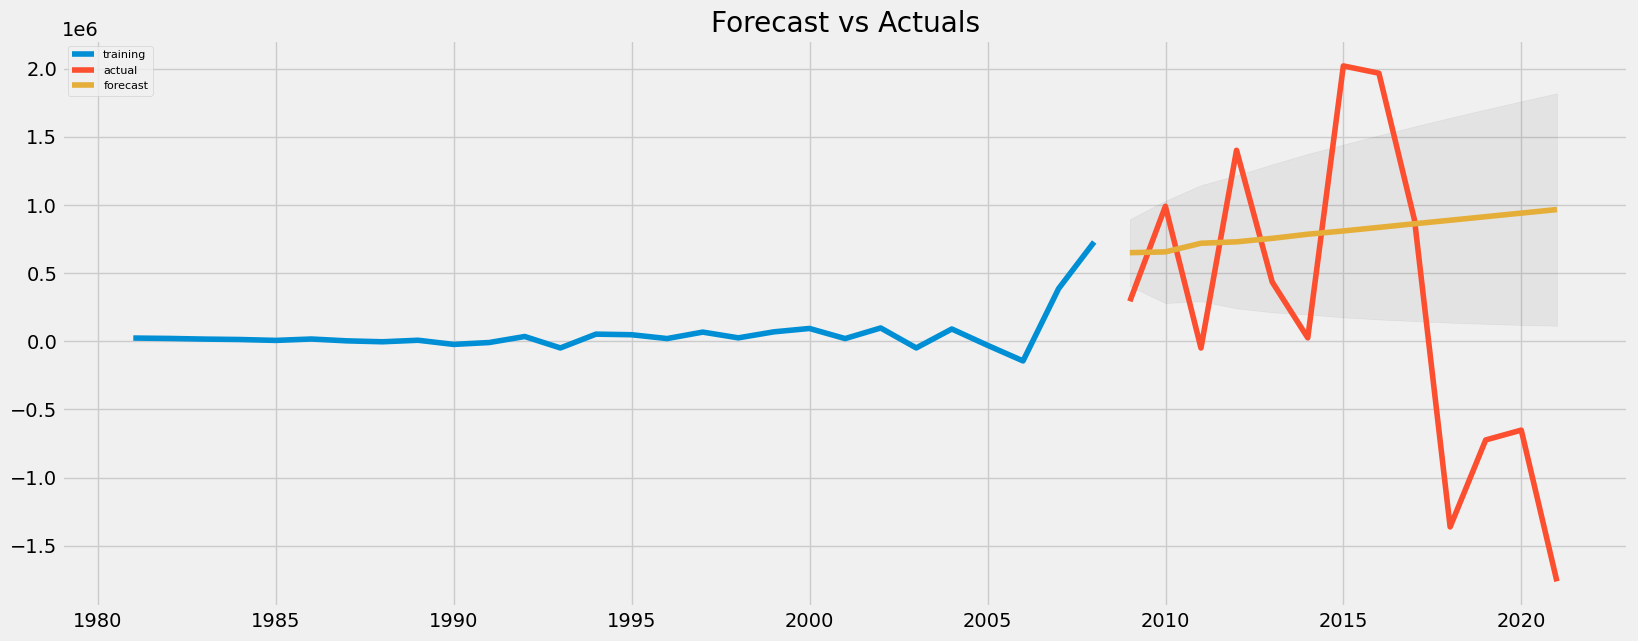

In [35]:
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [36]:
model = ARIMA(train, order=(2, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

LinAlgError: SVD did not converge

In [37]:
model = ARIMA(train, order=(2, 1, 3))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

LinAlgError: SVD did not converge

In [38]:
model = ARIMA(train, order=(2, 1, 4))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

                             ARIMA Model Results                              
Dep. Variable:            D.SumEvents   No. Observations:                   27
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -355.432
Method:                       css-mle   S.D. of innovations         125152.993
Date:                Fri, 28 Jan 2022   AIC                            722.865
Time:                        21:23:37   BIC                            730.640
Sample:                    12-31-1981   HQIC                           725.177
                         - 12-31-2007                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               2.61e+04   3.19e+04      0.818      0.413   -3.64e+04    8.87e+04
ar.L1.D.SumEvents    -0.5057      0.386     -1.309      0.190      -1.263       0.251
ar.L2.D.SumEvents    -0.

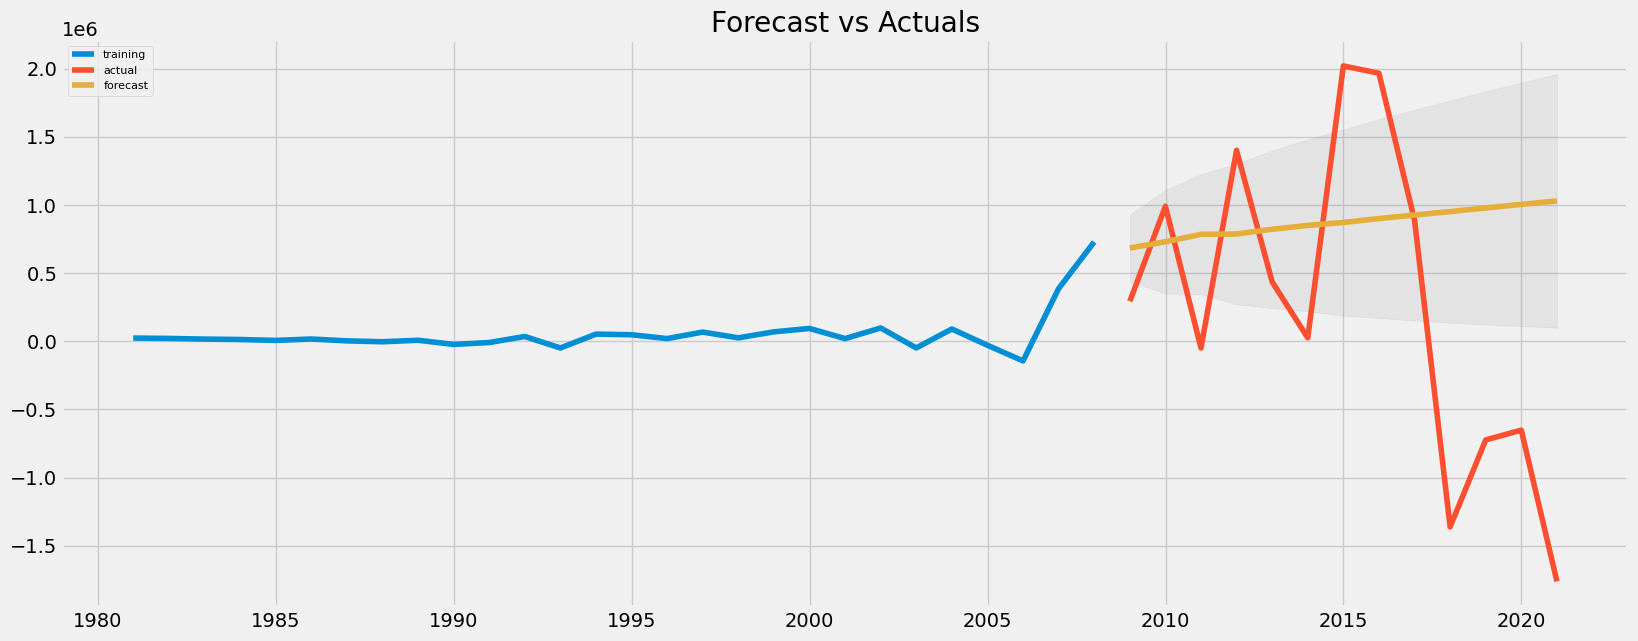

In [39]:
model = ARIMA(train, order=(3, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:            D.SumEvents   No. Observations:                   27
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -354.550
Method:                       css-mle   S.D. of innovations         113606.883
Date:                Fri, 28 Jan 2022   AIC                            723.100
Time:                        21:23:46   BIC                            732.171
Sample:                    12-31-1981   HQIC                           725.797
                         - 12-31-2007                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7457.7072   5321.440      1.401      0.161   -2972.124    1.79e+04
ar.L1.D.SumEvents     0.0775      0.404      0.192      0.848      -0.714       0.869
ar.L2.D.SumEvents    -0.

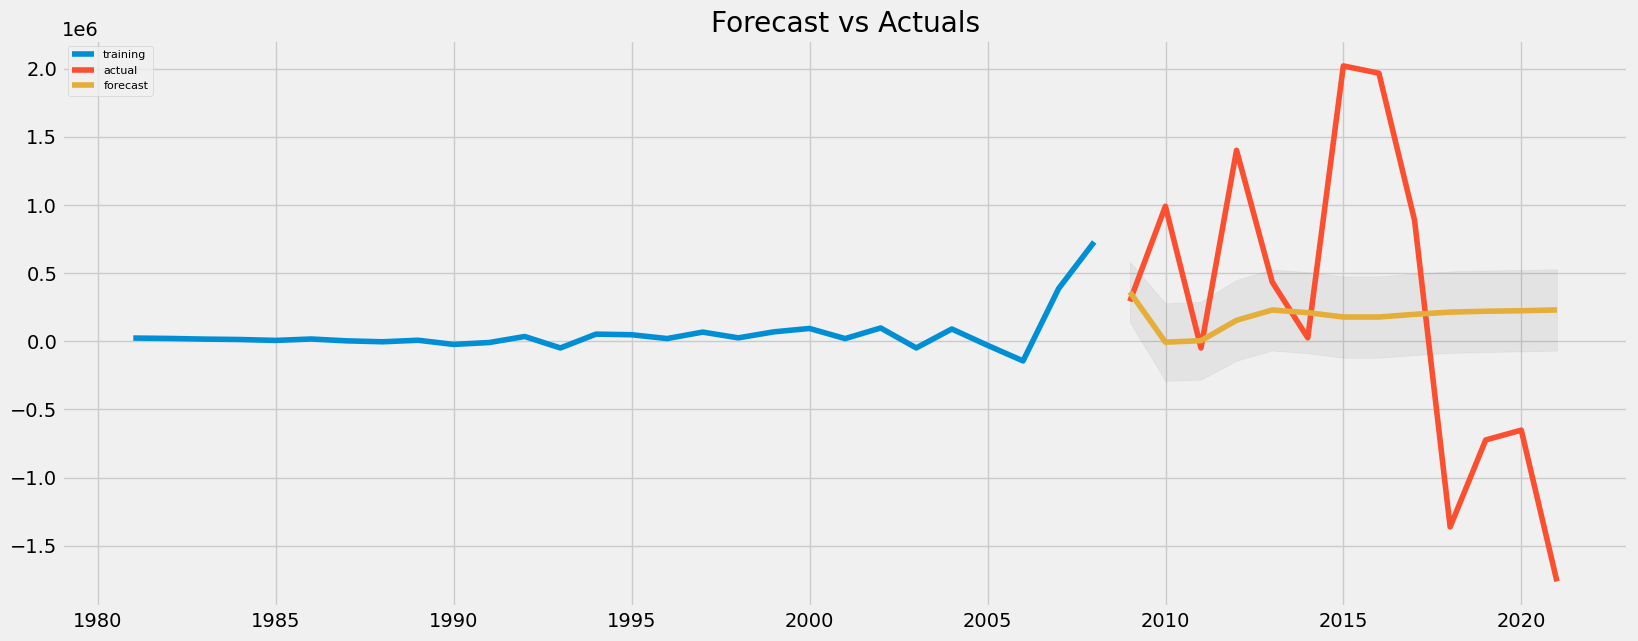

In [40]:
model = ARIMA(train, order=(3, 1, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:            D.SumEvents   No. Observations:                   27
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -353.485
Method:                       css-mle   S.D. of innovations         105496.734
Date:                Fri, 28 Jan 2022   AIC                            722.969
Time:                        21:23:56   BIC                            733.336
Sample:                    12-31-1981   HQIC                           726.052
                         - 12-31-2007                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.066e+04   1.06e+04      1.006      0.315   -1.01e+04    3.14e+04
ar.L1.D.SumEvents    -0.8188      0.464     -1.764      0.078      -1.729       0.091
ar.L2.D.SumEvents     0.

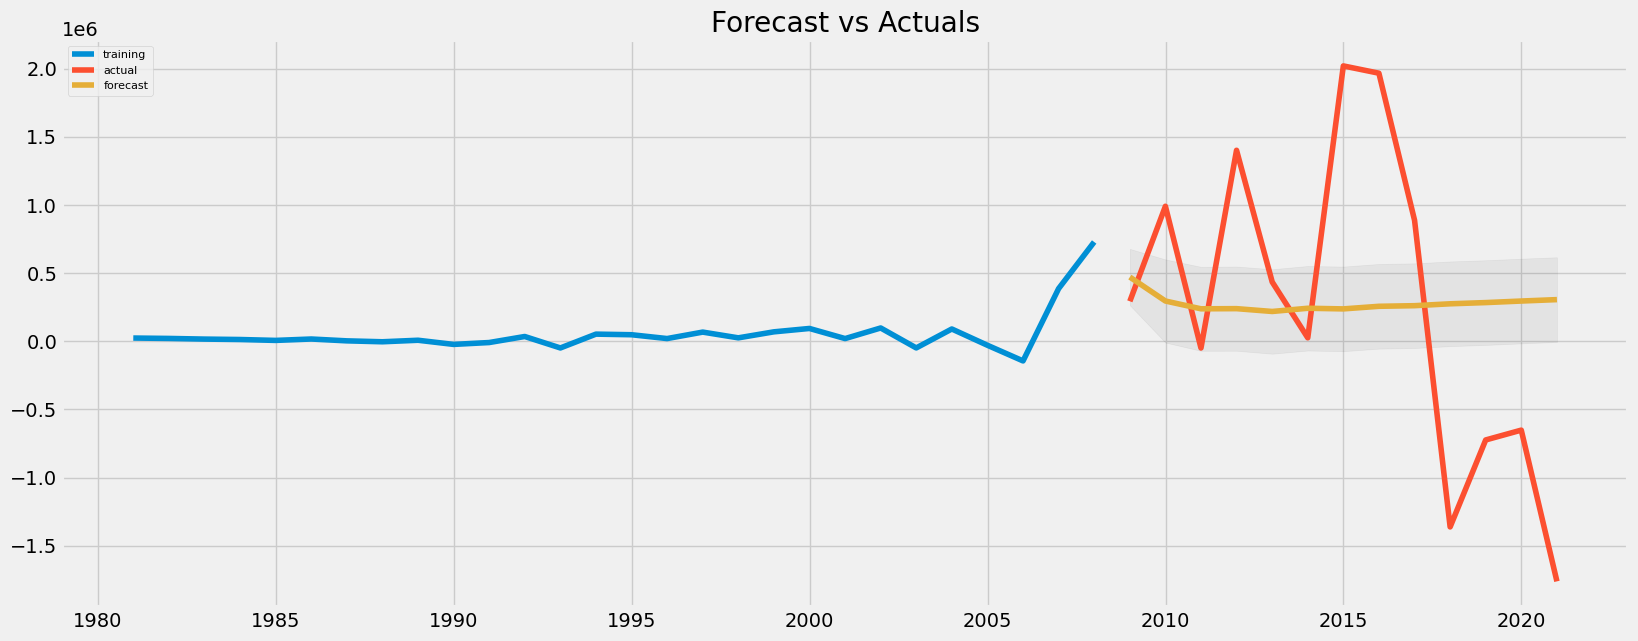

In [41]:
model = ARIMA(train, order=(3, 1, 3))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(13, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

##### This isn't working out. Time for another round of differencing.

### 7.4 Re-run differencing

In [42]:
# Apply differencing to data
timeline_t2=timeline_t1-timeline_t1.shift(1)
# Remove missing values
timeline_t2.dropna(inplace = True)

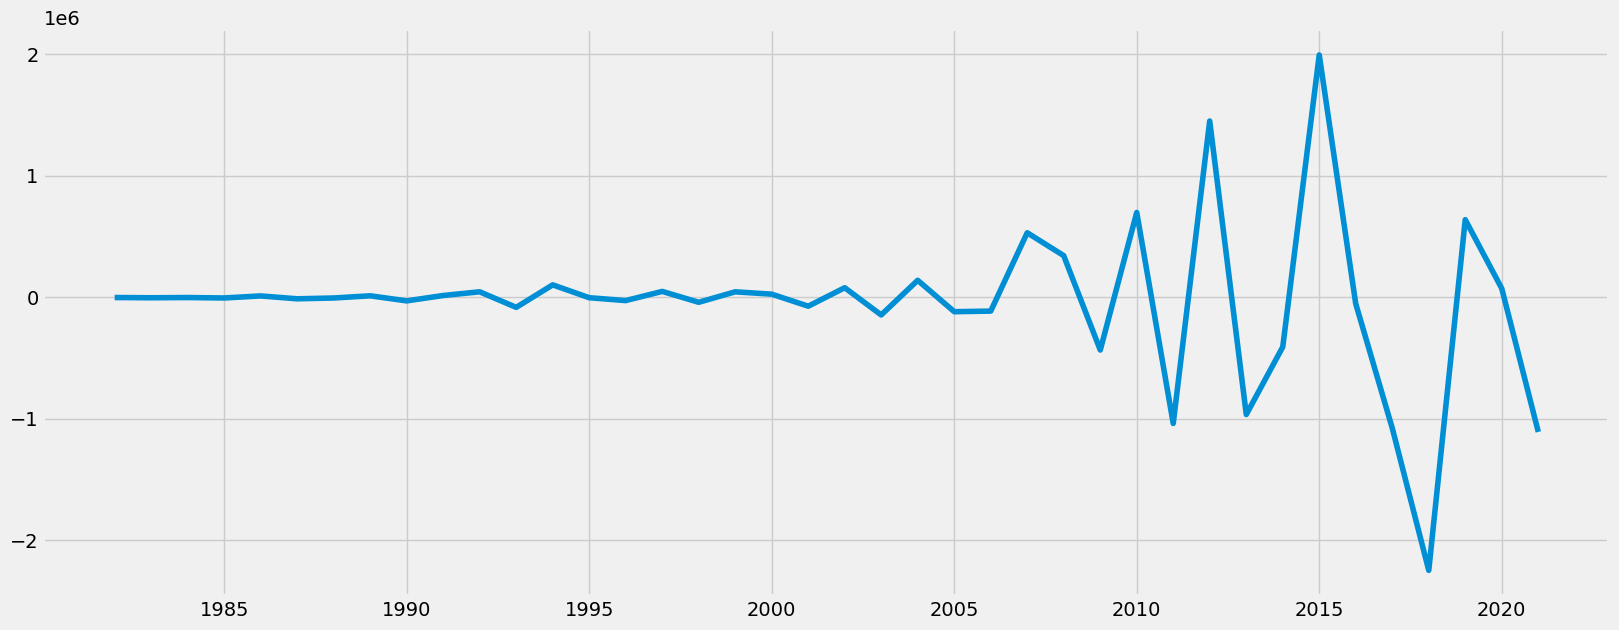

In [43]:
# Plot new data
plt.figure(dpi=100)
plt.plot(timeline_t2)

In [44]:
# Re-run Dickey-Fuller test
dickey_fuller(timeline_t2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.062344
p-value                         0.001117
Number of Lags Used            10.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


##### Test passes

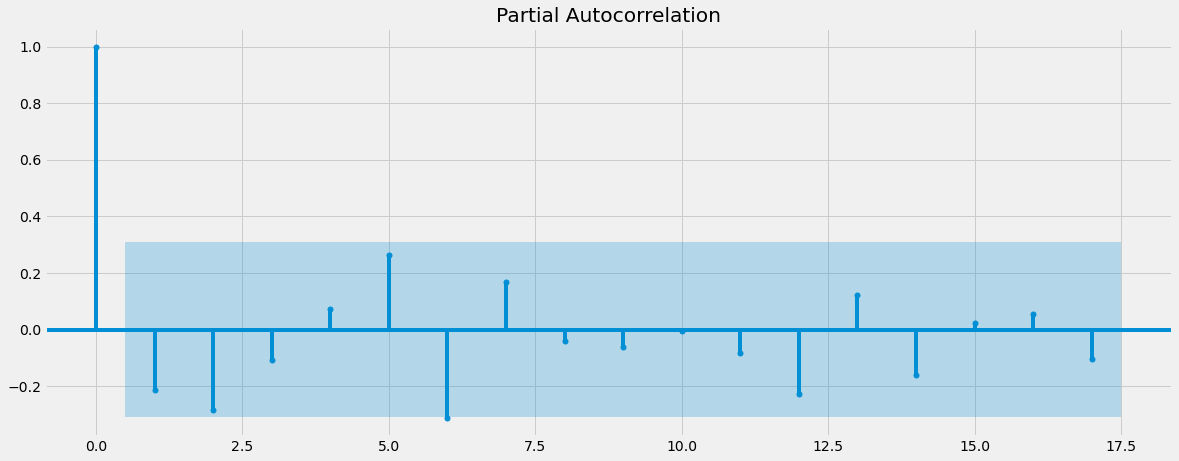

<Figure size 1800x700 with 0 Axes>

In [45]:
# Plot partial autocorrelations to find "p"
plot_pacf(timeline_t2)
plt.figure(dpi=100)
plt.show()

##### Only a single vertical bar above the shaded area, so I'll start with p=1

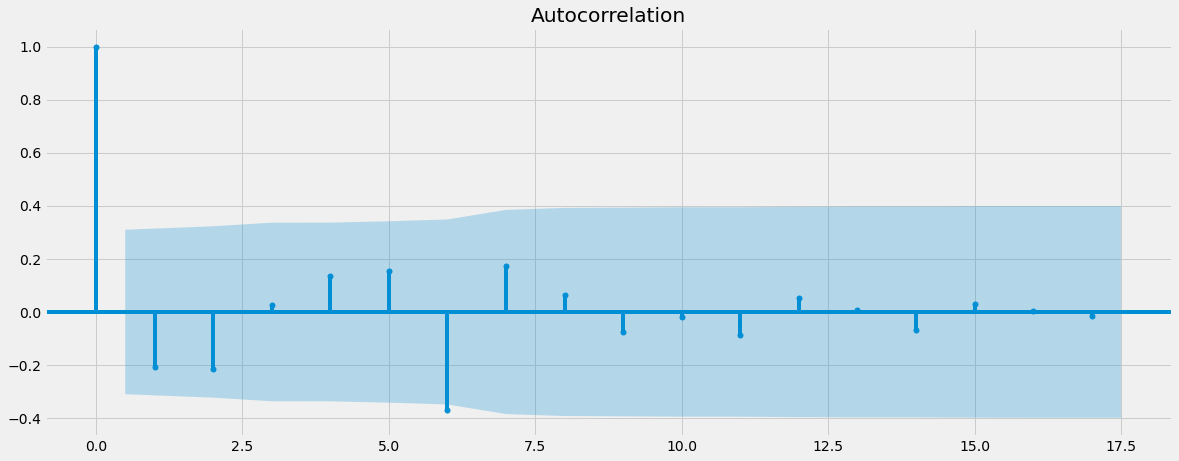

In [46]:
# Test for autocorrelation
plot_acf(timeline_t2)
plt.show()

##### Only a single vertical bar above the shaded area, so I'll start with q=1

### 7.5 Re-run ARIMA model

In [47]:
# Split data 70/30
train=timeline_t2[:int(timeline_t2.shape[0]*0.7)]
test=timeline_t2[int(timeline_t2.shape[0]*0.7):]

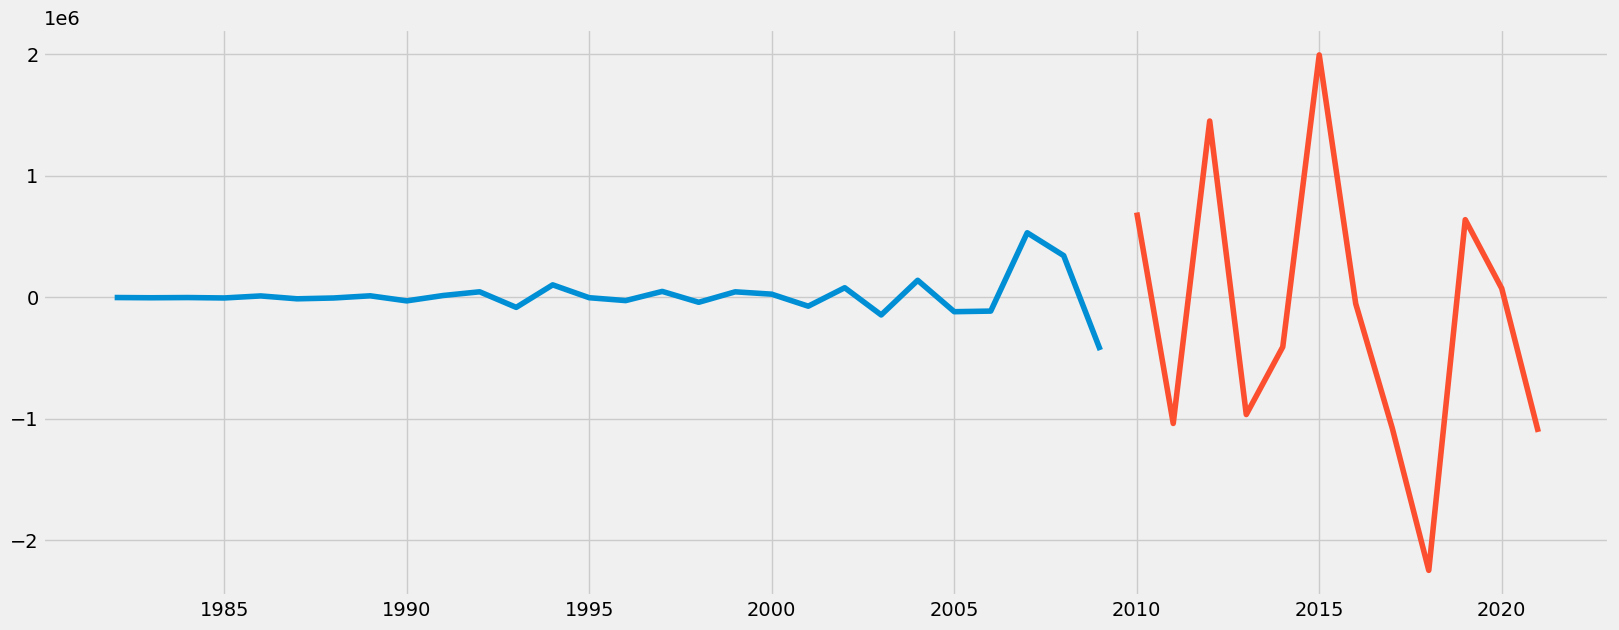

In [48]:
# Plot both sets to see the split
plt.figure(dpi=100)
plt.plot(train)
plt.plot(test)

In [49]:
test.shape

(12, 1)

In [50]:
model = ARIMA(train, order=(1, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

##### Increase "q" value as the error suggests

In [51]:
model = ARIMA(train, order=(1, 2, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [52]:
model = ARIMA(train, order=(1, 2, 3))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [53]:
model = ARIMA(train, order=(1, 2, 4))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [54]:
model = ARIMA(train, order=(2, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [55]:
model = ARIMA(train, order=(2, 2, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [56]:
model = ARIMA(train, order=(2, 2, 3))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [57]:
model = ARIMA(train, order=(2, 2, 4))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [58]:
model = ARIMA(train, order=(3, 2, 2))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [59]:
model = ARIMA(train, order=(3, 2, 5))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [60]:
model = ARIMA(train, order=(1, 2, 8))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [61]:
model = ARIMA(train, order=(1, 2, 10))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [62]:
model = ARIMA(train, order=(3, 2, 8))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

##### Time for a third round of differencing!

### 7.6 Re-run differencing

In [63]:
# Apply differencing to data
timeline_t3=timeline_t2-timeline_t2.shift(1)
# Remove missing values
timeline_t3.dropna(inplace = True)

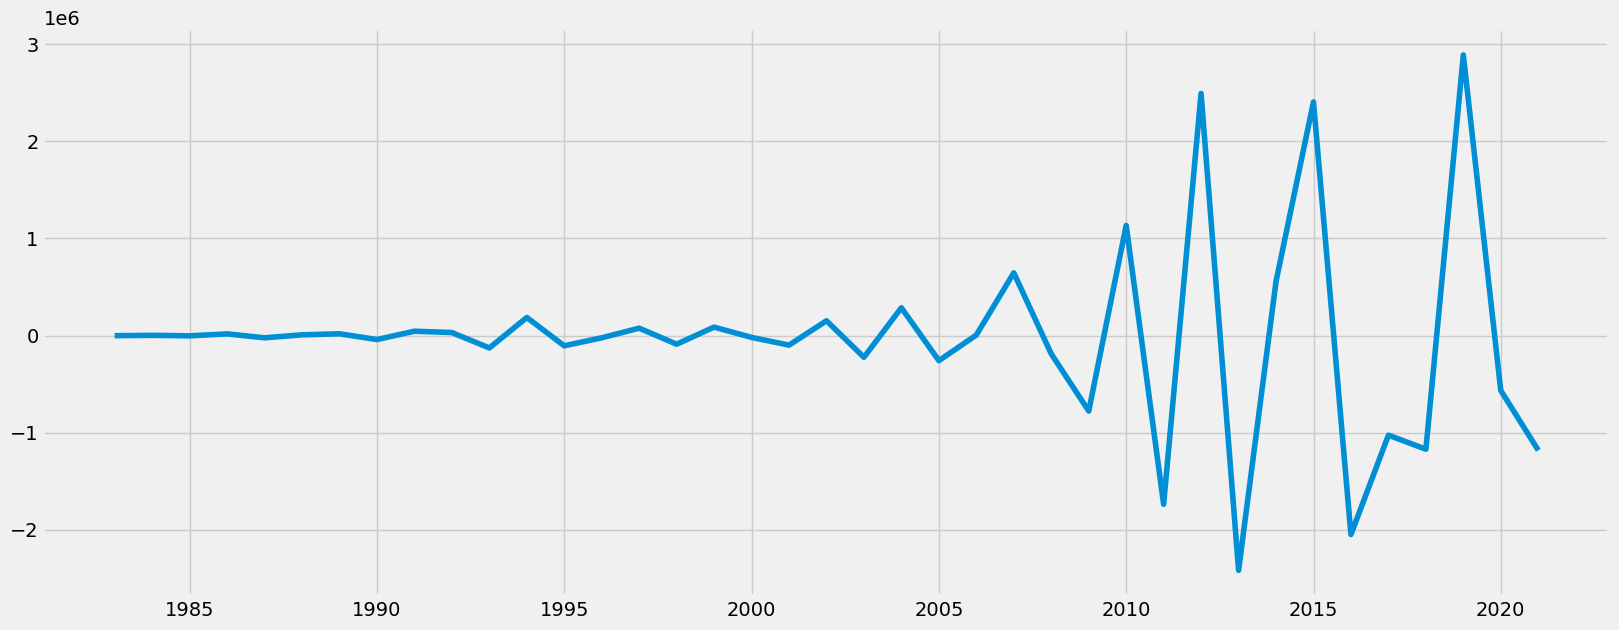

In [64]:
# Plot new data
plt.figure(dpi=100)
plt.plot(timeline_t3)

In [65]:
# Re-run Dickey-Fuller test
dickey_fuller(timeline_t3)

Dickey-Fuller Stationarity test:
Test Statistic                  1.470417
p-value                         0.997412
Number of Lags Used             8.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


##### Do it again!

In [66]:
# Apply differencing to data
timeline_t4=timeline_t3-timeline_t3.shift(1)
# Remove missing values
timeline_t4.dropna(inplace = True)

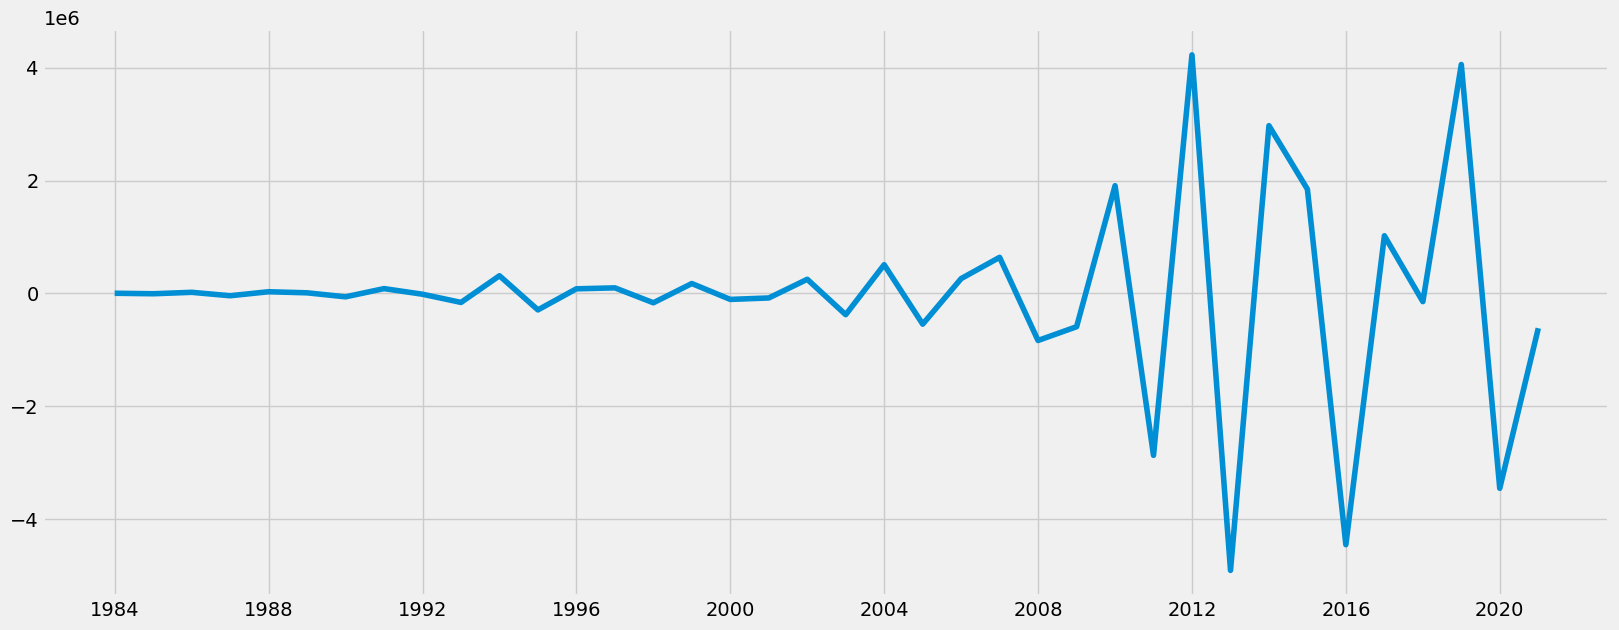

In [67]:
# Plot new data
plt.figure(dpi=100)
plt.plot(timeline_t4)

In [68]:
# Re-run Dickey-Fuller test
dickey_fuller(timeline_t4)

Dickey-Fuller Stationarity test:
Test Statistic                  1.113011
p-value                         0.995326
Number of Lags Used            10.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


##### Do it again!

In [69]:
# Apply differencing to data
timeline_t5=timeline_t4-timeline_t4.shift(1)
# Remove missing values
timeline_t5.dropna(inplace = True)

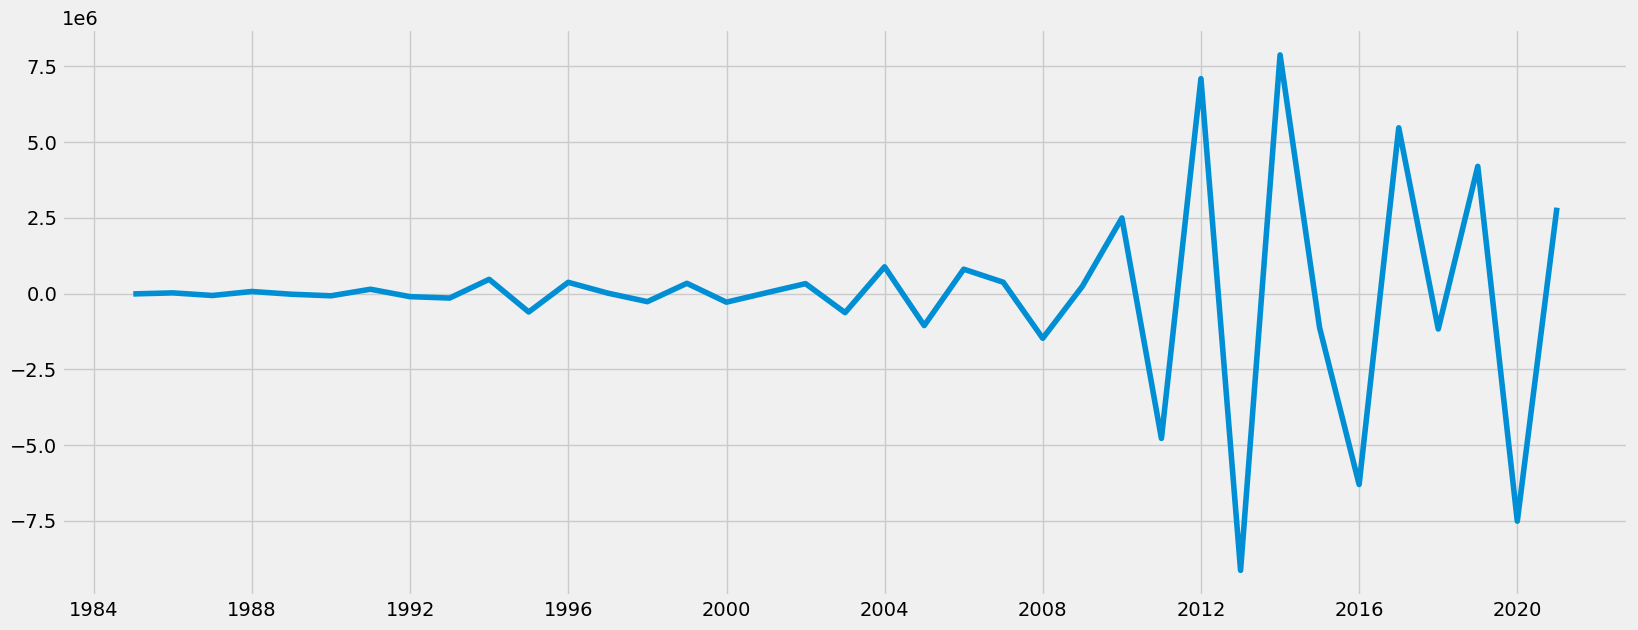

In [70]:
# Plot new data
plt.figure(dpi=100)
plt.plot(timeline_t5)

In [72]:
# Re-run Dickey-Fuller test
dickey_fuller(timeline_t5)

Dickey-Fuller Stationarity test:
Test Statistic                -6.634620e+00
p-value                        5.603090e-09
Number of Lags Used            9.000000e+00
Number of Observations Used    2.700000e+01
Critical Value (1%)           -3.699608e+00
Critical Value (5%)           -2.976430e+00
Critical Value (10%)          -2.627601e+00
dtype: float64


##### Passes

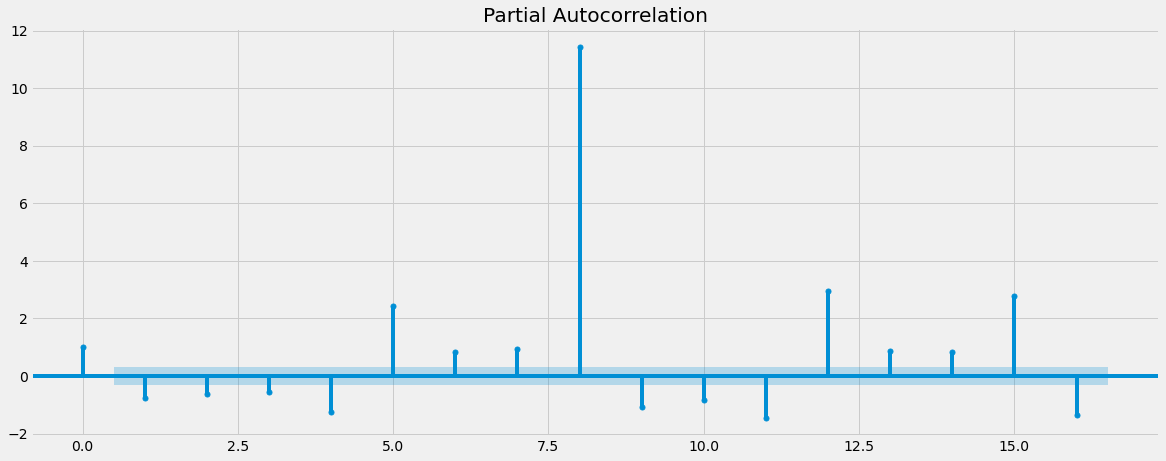

<Figure size 1800x700 with 0 Axes>

In [73]:
# Plot partial autocorrelations to find "p"
plot_pacf(timeline_t5)
plt.figure(dpi=100)
plt.show()

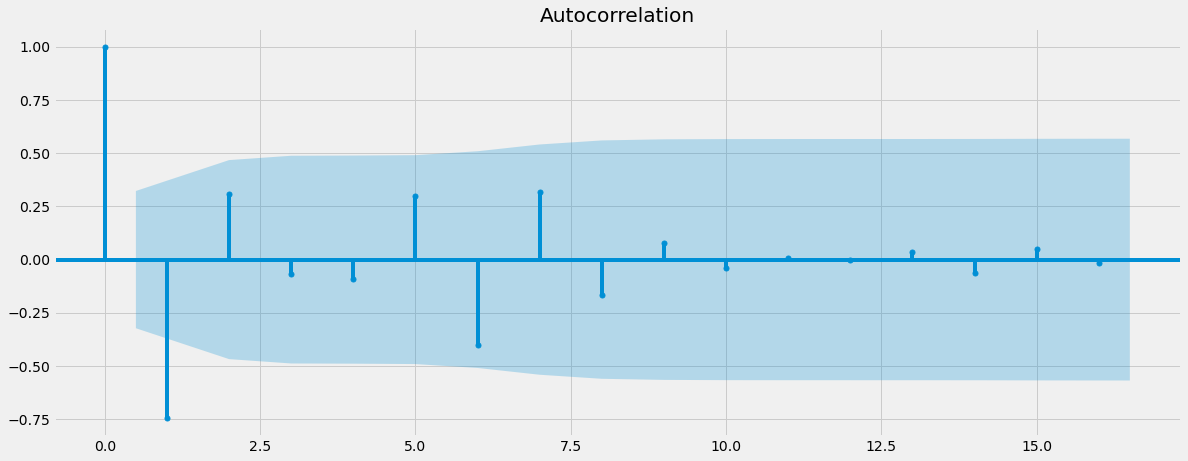

In [74]:
# Test for autocorrelation
plot_acf(timeline_t5)
plt.show()

### 7.7 Re-run ARIMA model

In [75]:
# Split data 70/30
train=timeline_t5[:int(timeline_t5.shape[0]*0.7)]
test=timeline_t5[int(timeline_t5.shape[0]*0.7):]

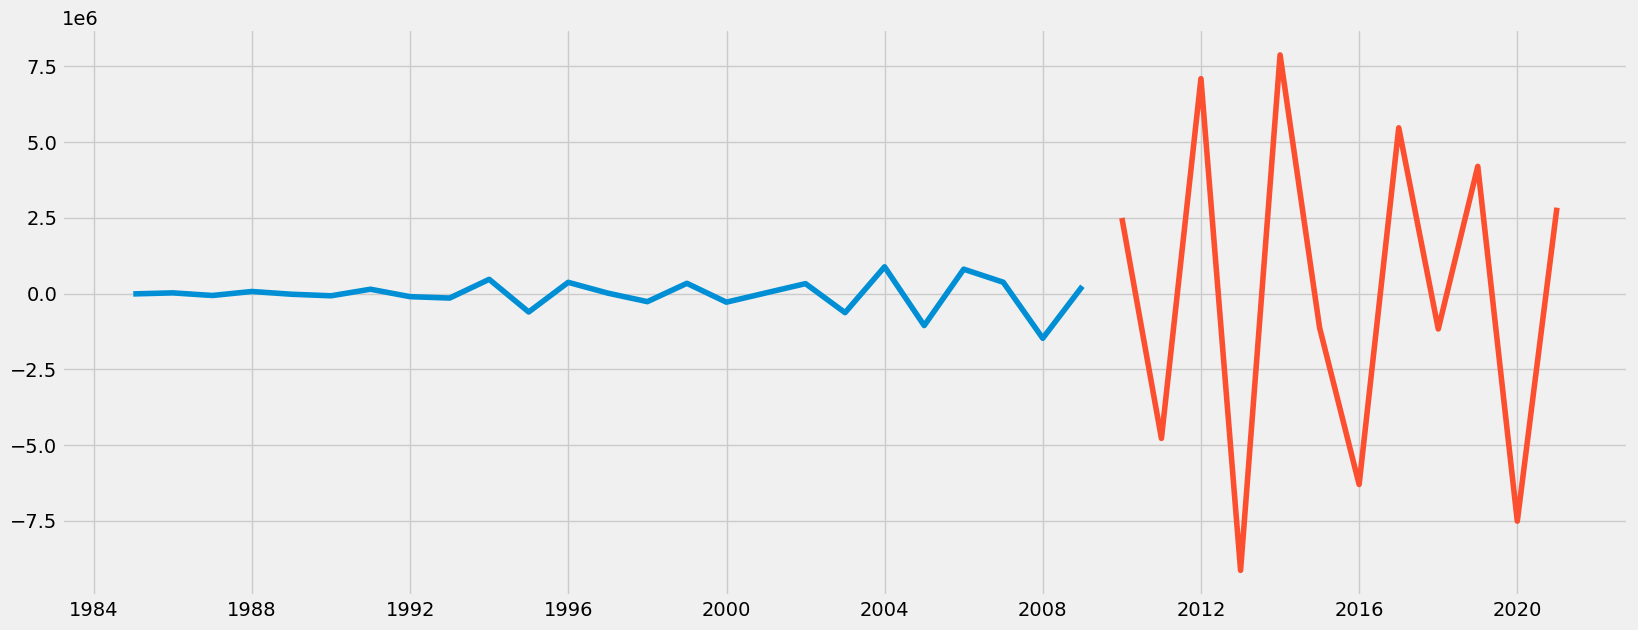

In [76]:
# Plot both sets to see the split
plt.figure(dpi=100)
plt.plot(train)
plt.plot(test)

In [77]:
test.shape

(12, 1)

In [79]:
model = ARIMA(train, order=(1, 5, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast with 95% confidence interval
fc, se, conf = fitted.forecast(12, alpha=0.05)

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot results
plt.figure(dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: d > 2 is not supported

##### If I cannot run this with d > 2, then I cannot proceed.